In [111]:
import numpy as np
import pandas as pd


In [536]:
raw_data=pd.read_csv('deliveries.csv')
wk_raw_data=pd.read_csv('IPLWK.csv')

In [552]:
data=raw_data.copy()
wk_data=wk_raw_data.copy()
data.head()
flatten = lambda r: [item for sublist in r for item in sublist]

In [350]:
wk_data.head()

,MatchID,Team,WK
0,0,Sunrisers Hyderabad,NV Ojha
1,0,Royal Challengers Bangalore,KM Jadhav
2,1,Mumbai Indians,PA Patel
3,1,Rising Pune Supergiant,MS Dhoni
4,2,Gujarat Lions,KD Karthik


In [347]:
IPL_2008=data.loc[(data['match_id']>=60)&(data['match_id']<=117)]
IPL_2009=data.loc[(data['match_id']>=118)&(data['match_id']<=174)]
IPL_2010=data.loc[(data['match_id']>=175)&(data['match_id']<=234)]
IPL_2011=data.loc[(data['match_id']>=235)&(data['match_id']<=307)]
IPL_2012=data.loc[(data['match_id']>=308)&(data['match_id']<=381)]
IPL_2013=data.loc[(data['match_id']>=382)&(data['match_id']<=457)]
IPL_2014=data.loc[(data['match_id']>=458)&(data['match_id']<=517)]
IPL_2015=data.loc[(data['match_id']>=518)&(data['match_id']<=576)]
IPL_2016=data.loc[(data['match_id']>=577)&(data['match_id']<=636)]
IPL_2017=data.loc[(data['match_id']>=0)&(data['match_id']<=59)]
IPL_2018=data.loc[(data['match_id']>=7894)&(data['match_id']<=10000)]
IPL_2019=data.loc[(data['match_id']>=11137)]

In [115]:
years=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

In [116]:
IPL=[IPL_2008,IPL_2009,IPL_2010,IPL_2011,IPL_2012,IPL_2013,IPL_2014,IPL_2015,IPL_2016,IPL_2017,IPL_2018,IPL_2019]

In [117]:
def bowler(str,start,end):
    a=[]
    for i in range(start-1,end):
        b=IPL[i]
        c=b[b['bowler']==str]
        a.append(c)
    return a

In [118]:
def wickets(m,start,end):
    a=[]
    for i in range(start-1,end):
        bowler=m[i]
        wickets=bowler.dropna(subset=['player_dismissed'])
        wickets=wickets[wickets.dismissal_kind!='run out']
        a.append(wickets)
    return a

In [119]:
m=bowler('SL Malinga',1,12)
w=wickets(m,1,12)
len(w)

12

In [120]:
def calc_fib(w):
    total=[]
    fiw=[]
    fib_percent=[]
    for i in range(len(w)):
        a=w[i]
        total.append(a.shape[0])
        b=a[a['fielder'].isnull()]
        fiw.append(b.shape[0])
        if a.shape[0]!=0:
            c=float(100*b.shape[0]/a.shape[0])
            fib_percent.append(round(c,2))
        else:
            fib_percent.append(0)
    return total,fiw ,fib_percent   

In [121]:
total_malinga,fiw_malinga,final_fib_malinga=calc_fib(w)

In [122]:
final_fib_malinga

[0, 61.11, 53.33, 64.29, 50.0, 65.0, 37.5, 29.17, 0, 36.36, 0, 6.25]

In [123]:
class CALC_FIB:
    def __init__(self,bowler):
        self.bowler=bowler
    
    def bowler_complete(self):
        a=[]
        for i in range(12):
            b=IPL[i]
            c=b[b['bowler']==self.bowler]
            a.append(c)
        return a

    def wickets(self):
        a=[]
        m=self.bowler_complete()
        for i in range(12):
            b=m[i]
            wickets=b.dropna(subset=['player_dismissed'])
            wickets=wickets[wickets.dismissal_kind!='run out']
            a.append(wickets)
        return a
    
    def fib_calculator(self):
        w=self.wickets()
        total=[]
        fiw=[]
        fib_percent=[]
        for i in range(len(w)):
            a=w[i]
            total.append(a.shape[0])
            b=a[a['fielder'].isnull()]
            fiw.append(b.shape[0])
            if a.shape[0]!=0:
                c=float(100*b.shape[0]/a.shape[0])
                fib_percent.append(round(c,2))
            else:
                fib_percent.append(0)
        return total,fiw,fib_percent 
    
    def strike_rate(self):
        b=self.bowler_complete()
        w=self.wickets()
        tb=0
        total_balls_season=[]
        tw=0
        for i in range(len(w)):
            total_balls_season.append(len(b[i]))
            tw=tw+len(w[i])
            tb=tb+len(b[i])
        if tw!=0:
            sr=tb/tw
            strike_rate_final=round(sr,2)
            return strike_rate_final

In [124]:
r=CALC_FIB('SL Malinga').fib_calculator()
q=CALC_FIB('SL Malinga').strike_rate()
q

17.49

In [125]:
r[2]

[0, 61.11, 53.33, 64.29, 50.0, 65.0, 37.5, 29.17, 0, 36.36, 0, 6.25]

In [126]:
bowlers=data['bowler']

In [127]:
q=set(bowlers)

In [128]:
k=list(q)

In [129]:
len(k)
k[1]

'CR Woakes'

In [130]:
bowler_name=[]
total_wickets_season=[]
fielding_ind_wickets_season=[]
fielding_ind_percent=[]
sum_total_wickets=[]
sum_fiw=[]
average_fip=[]
strike_r=[]
for i in range(len(k)):
    r=CALC_FIB(k[i]).fib_calculator()
    u=CALC_FIB(k[i]).strike_rate()
    if sum(r[0])!=0:
        bowler_name.append(k[i])
        total_wickets_season.append(r[0])
        fielding_ind_wickets_season.append(r[1])
        fielding_ind_percent.append(r[2])
        sum_total_wickets.append(sum(r[0]))
        sum_fiw.append(sum(r[1]))
        average_fip.append(100*round(sum(r[1])/sum(r[0]),2))
        strike_r.append(u)
    

In [296]:
len(bowler_name)

348

In [132]:
final_fiwp_bowlers=pd.DataFrame({'Bowler':bowler_name,'Total Wickets':sum_total_wickets,
                                 'FIW':sum_fiw,'Average FIWP':average_fip,'Strike Rate':strike_r})

In [133]:
final_fiwp_bowlers.head()

,Bowler,Total Wickets,FIW,Average FIWP,Strike Rate
0,CR Woakes,25,6,24.0,15.84
1,B Kumar,133,48,36.0,20.35
2,JJ Bumrah,82,28,34.0,21.93
3,DNT Zoysa,2,1,50.0,34.50
4,YA Abdulla,15,5,33.0,14.80


In [134]:
final_fiwp=final_fiwp_bowlers.sort_values(by='Total Wickets',ascending=False)

In [135]:
top_50=final_fiwp.iloc[:51,:]

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [137]:
top_50

,Bowler,Total Wickets,FIW,Average FIWP,Strike Rate
142,SL Malinga,170,79,46.0,17.49
309,A Mishra,156,42,27.0,20.33
191,Harbhajan Singh,150,49,33.0,23.01
16,PP Chawla,149,63,42.0,21.19
123,DJ Bravo,147,34,23.0,18.44
1,B Kumar,133,48,36.0,20.35
186,R Ashwin,125,39,31.0,24.13
338,SP Narine,122,59,48.0,21.31
163,UT Yadav,119,30,25.0,21.89
251,RA Jadeja,108,41,38.0,23.53


In [138]:
#sns.pairplot(top_50)

In [208]:
def yearly_fiwp(b_name):
    years_func=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
    b=bowler_name.index(b_name)
    t=total_wickets_season[b]
    f=fielding_ind_percent[b]
    y=years_func
    present=[]
    fiwp=[]
    wickets=[]
    played=[]
    for i in range(len(t)):
        if t[i]!=0:
            present.append(i)
    for i in range(len(present)):
        played.append(y[present[i]])
        wickets.append(t[present[i]])
        fiwp.append(f[present[i]])
    return present,played,wickets,fiwp

In [209]:
%matplotlib inline

In [210]:
yearly_fiwp('SL Malinga')

([1, 2, 3, 4, 5, 6, 7, 9, 11],
 [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2019],
 [18, 15, 28, 22, 20, 16, 24, 11, 16],
 [61.11, 53.33, 64.29, 50.0, 65.0, 37.5, 29.17, 36.36, 6.25])

In [211]:
yearly_fiwp('Rashid Khan')

([9, 10, 11], [2017, 2018, 2019], [17, 21, 17], [70.59, 57.14, 41.18])

In [212]:
yearly_fiwp('MJ McClenaghan')

([7, 8, 9, 10, 11],
 [2015, 2016, 2017, 2018, 2019],
 [18, 17, 19, 14, 3],
 [0.0, 29.41, 31.58, 14.29, 0.0])

In [213]:
yearly_fiwp('DJ Bravo')

([0, 1, 2, 3, 4, 5, 7, 8, 10, 11],
 [2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2018, 2019],
 [11, 11, 4, 6, 15, 32, 26, 17, 14, 11],
 [45.45, 9.09, 25.0, 16.67, 26.67, 28.12, 11.54, 47.06, 7.14, 9.09])

In [297]:
def plot_fiwp(b_name):
    b=yearly_fiwp(b_name)
    wickets=b[2]
    marker=[]
    for i in range(len(wickets)):
        marker.append(wickets[i]**2)
    fiwp=b[3]
    y=b[1]
    mean=np.mean(fiwp)
    league_mean=26.35
    league_mean_list=[]
    mean_list=[]
    for i in range(len(wickets)):
        mean_list.append(mean)
        league_mean_list.append(league_mean)
    plt.figure(figsize=(7,4))
    ax = plt.axes()
    plt.ylim(-10,80 )
    # Setting the background color
    ax.set_facecolor("khaki")
    ax.tick_params(axis='both', which='major', labelsize=16)
    #plt.scatter(y,t,label='WICKETS')
    plt.scatter(y,fiwp,label='FIWP',s=marker,color='maroon')
    #plt.plot(y,t)
    plt.plot(y,fiwp,color='maroon')
    plt.plot(y,mean_list,color='maroon',linestyle='--',linewidth=5,label='Bowler Mean')
    plt.plot(y,league_mean_list,color='black',linestyle='--',linewidth=3,label='League Mean')
    plt.title(b_name,fontsize=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 14}, borderaxespad=0.)
    plt.show()

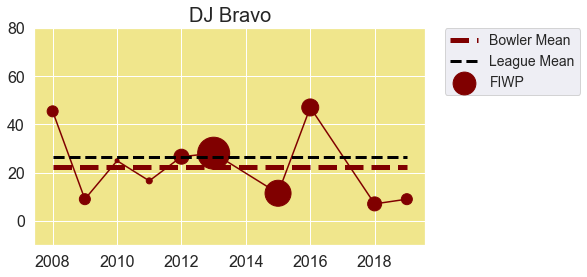

In [323]:
plot_fiwp('DJ Bravo')

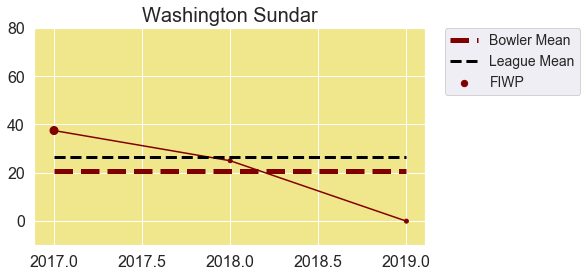

In [322]:
plot_fiwp('Washington Sundar')

In [500]:
i=CALC_FIB('SL Malinga').wickets()
len(i)

12

In [554]:
def wkincl(bowler_name):
    all_wickets=CALC_FIB(bowler_name).wickets()
    wk_wickets=[]
    #year_wickets=[]
    for i in range(len(all_wickets)):
        wk_pairs=[]
        b=all_wickets[i]
        for j in range(len(b)):
            m1=all_wickets[i].iloc[j,0]
            m2=wk_data[wk_data['MatchID']==m1]
            wk=list(m2['WK'])
            wk_pairs.append(wk)
        wk_season=set(flatten(wk_pairs))
        q=b[(b['fielder'].isin(wk_season))]
        wk_wickets.append(q)
    return wk_wickets

In [538]:
i11=i[11]
r=[]
for j in range(len(i11)):
    m1=i[11].iloc[j,0]
    m2=wk_data[wk_data['MatchID']==m1]
    m3=list(m2['WK'])
    print(m3)
    r.append(m3)

['Q de Kock', 'MS Dhoni']
['Q de Kock', 'MS Dhoni']
['Q de Kock', 'MS Dhoni']
['PA Patel', 'Q de Kock']
['PA Patel', 'Q de Kock']
['PA Patel', 'Q de Kock']
['PA Patel', 'Q de Kock']
['Q de Kock', 'RR Pant']
['Q de Kock', 'AT Rayudu']
['Q de Kock', 'AT Rayudu']
['Q de Kock', 'AT Rayudu']
['Q de Kock', 'AT Rayudu']
['KD Karthik', 'Q de Kock']
['KD Karthik', 'Q de Kock']
['KD Karthik', 'Q de Kock']
['Q de Kock', 'MS Dhoni']


In [539]:
len(i11)

16

In [540]:

w1=set(flatten(r))
w1

{'AT Rayudu', 'KD Karthik', 'MS Dhoni', 'PA Patel', 'Q de Kock', 'RR Pant'}

In [542]:
q=i11[(i11['fielder'].isin(w1))]

In [556]:
mali=wkincl('SL Malinga')

In [565]:

for i in range(len(mali)):
    

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
124286,524,1,Kings XI Punjab,Mumbai Indians,16,3,DA Miller,GJ Bailey,SL Malinga,0,...,0,0,0,0,0,0,0,DA Miller,caught,AP Tare
128525,541,2,Sunrisers Hyderabad,Mumbai Indians,19,1,GH Vihari,KV Sharma,SL Malinga,0,...,0,0,0,0,0,0,0,GH Vihari,caught,PA Patel
131668,556,1,Delhi Daredevils,Mumbai Indians,1,1,MA Agarwal,SS Iyer,SL Malinga,0,...,0,0,0,0,0,0,0,MA Agarwal,caught,PA Patel
134418,567,2,Kolkata Knight Riders,Mumbai Indians,16,5,AD Russell,YK Pathan,SL Malinga,0,...,0,0,0,0,0,0,0,AD Russell,caught,PA Patel
